In [1]:
from wgan import WGAN
from load_dataset import parser, full_parser
import tensorflow as tf
from tensorflow import keras
import pickle


2022-10-06 12:08:26.960559: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-10-06 12:08:27.196065: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-10-06 12:08:27.196089: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-10-06 12:08:27.231090: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-10-06 12:08:28.209197: W tensorflow/stream_executor/platform/de

In [2]:
# Creating GAN
wgan = WGAN()

2022-10-06 12:08:30.139691: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcuda.so.1'; dlerror: libcuda.so.1: cannot open shared object file: No such file or directory
2022-10-06 12:08:30.139771: W tensorflow/stream_executor/cuda/cuda_driver.cc:263] failed call to cuInit: UNKNOWN ERROR (303)
2022-10-06 12:08:30.139797: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (gaspard-HP-ZBook-15u-G2): /proc/driver/nvidia/version does not exist
2022-10-06 12:08:30.140057: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 16)        592       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 32, 32, 16)        0         
                                                                 
 dropout (Dropout)           (None, 32, 32, 16)        0         
                                                                 
 conv2d_1 (Conv2D)           (None, 16, 16, 32)        4640      
                                                                 
 zero_padding2d (ZeroPadding  (None, 17, 17, 32)       0         
 2D)                                                             
                                                                 
 batch_normalization (BatchN  (None, 17, 17, 32)       128       
 ormalization)                                          

In [3]:
# Importing the dataset
tfile = "/home/gaspard/ETHZ/Master_Arbeit/acoupipe_datasets/training_1-100000_csmtriu_1src_he4.0625-1393.4375Hz_ds1-v001_13-Sep-2022.tfrecord"
dataset = tf.data.TFRecordDataset(filenames=[tfile])

# The parser convert the CSMTRIU into eigenvector (TODO: need to be extended to also extract the eigenvalues.)
dataset = dataset.map(full_parser)
#dataset = dataset.map(parser)

#  Creating the batches
dataset = dataset.shuffle(buffer_size=10).batch(wgan.batch_size)


>epoch 1
loss: [c_real=-2.057][c_fake=-0.693][g=0.018]
acc: [c=0.056][g=0.000]
>epoch 2
loss: [c_real=-5.555][c_fake=-2.148][g=1.178]
acc: [c=0.006][g=0.000]
>epoch 3
loss: [c_real=-8.282][c_fake=-4.530][g=10.200]
acc: [c=0.000][g=0.000]
>epoch 4
loss: [c_real=-10.761][c_fake=-6.807][g=22.432]
acc: [c=0.000][g=0.000]
>epoch 5
loss: [c_real=-13.509][c_fake=-9.157][g=24.315]
acc: [c=0.000][g=0.000]
>epoch 6
loss: [c_real=-16.027][c_fake=-11.836][g=24.609]
acc: [c=0.000][g=0.000]
>epoch 7
loss: [c_real=-18.208][c_fake=-14.485][g=22.301]
acc: [c=0.000][g=0.000]
>epoch 8
loss: [c_real=-19.980][c_fake=-17.137][g=20.580]
acc: [c=0.000][g=0.000]
>epoch 9
loss: [c_real=-22.526][c_fake=-20.211][g=17.308]
acc: [c=0.000][g=0.000]
>epoch 10
loss: [c_real=-25.599][c_fake=-23.020][g=14.647]
acc: [c=0.000][g=0.000]
>epoch 11
loss: [c_real=-26.954][c_fake=-25.634][g=11.170]
acc: [c=0.000][g=0.000]
>epoch 12
loss: [c_real=-28.771][c_fake=-28.572][g=9.248]
acc: [c=0.000][g=0.000]
>epoch 13
loss: [c_real=

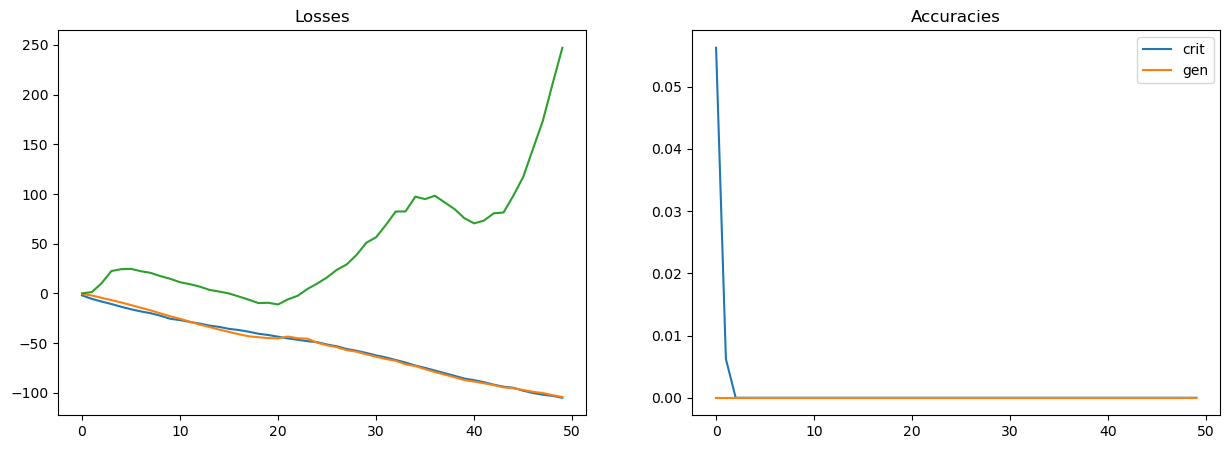

In [4]:
# Training the GAN
wgan.train(n_epochs=50
, dataset=dataset)

In [5]:
# backup wgan
file_to_store = open("backup_wgan.pickle", "wb")
pickle.dump(wgan, file_to_store)
file_to_store.close()

AttributeError: Can't pickle local object 'make_gradient_clipnorm_fn.<locals>.<lambda>'

In [ ]:
# get wgan from backup
file_to_read = open("backup_wgan.pickle", "rb")
generated_backup = pickle.load(file_to_read)
file_to_read.close()

In [6]:
import matplotlib.pyplot as plt

# Generating a sample:
generated = wgan.get_sample()

if generated != None:
    evecs_r = generated[0,:,:,0]
    evecs_i = generated[0,:,:,1]
    evals_r = generated[0,:,:,2]
    evals_i = generated[0,:,:,3]

    fig = plt.figure(figsize=(15,15))
    plt.subplot(2,2,1)
    plt.imshow(evecs_r)
    plt.subplot(2,2,2)
    plt.imshow(evecs_i)
    plt.subplot(2,2,3)
    plt.imshow(evals_r)
    plt.subplot(2,2,4)
    plt.imshow(evals_i)


1/1 [==============================] - 0s 215ms/step
tf.Tensor(-160.6439, shape=(), dtype=float32)
1/1 [==============================] - 0s 46ms/step
tf.Tensor(-159.65636, shape=(), dtype=float32)
1/1 [==============================] - 0s 62ms/step
tf.Tensor(-179.19072, shape=(), dtype=float32)
1/1 [==============================] - 0s 62ms/step
tf.Tensor(-160.01604, shape=(), dtype=float32)
1/1 [==============================] - 0s 61ms/step
tf.Tensor(-176.73567, shape=(), dtype=float32)
1/1 [==============================] - 0s 57ms/step
tf.Tensor(-145.9403, shape=(), dtype=float32)
1/1 [==============================] - 0s 52ms/step
tf.Tensor(-166.32904, shape=(), dtype=float32)
1/1 [==============================] - 0s 53ms/step
tf.Tensor(-165.45367, shape=(), dtype=float32)
1/1 [==============================] - 0s 54ms/step
tf.Tensor(-152.29437, shape=(), dtype=float32)
1/1 [==============================] - 0s 49ms/step
tf.Tensor(-163.88281, shape=(), dtype=float32)
1/1 [======

In [ ]:
# Backup of generated sample
import pickle

file_to_store = open("backup_generated.pickle", "wb")
pickle.dump(generated, file_to_store)
file_to_store.close()


In [ ]:
# restauring file from backup
file_to_read = open("backup_generated.pickle", "rb")
generated_backup = pickle.load(file_to_read)
file_to_read.close()

In [ ]:
from beamforming import beamform

beamform(generated_backup)